In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("mental_health_diagnosis_treatment_.csv")
df

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,Generalized Anxiety,10,4,8,6,Mood Stabilizers,Dialectical Behavioral Therapy,2024-04-09,8,9,Improved,10,Depressed,73
496,497,22,Male,Panic Disorder,5,6,6,7,Benzodiazepines,Mindfulness-Based Therapy,2024-02-05,13,6,Deteriorated,8,Happy,86
497,498,23,Male,Major Depressive Disorder,7,3,4,2,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,10,5,Deteriorated,5,Neutral,87
498,499,48,Male,Bipolar Disorder,9,4,6,9,Antidepressants,Mindfulness-Based Therapy,2024-03-22,10,6,Improved,7,Anxious,73


In [11]:
imputer = SimpleImputer(strategy='median')  # Untuk fitur numerik
df[['Age', 'Physical Activity (hrs/week)	']] = imputer.fit_transform(df[['Age', 'Physical Activity (hrs/week)']])

In [15]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df[['Gender', 'Diagnosis', 'Medication', 'Therapy Type']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

In [21]:
numerical_features = df[['Age', 'Symptom Severity (1-10)', 'Physical Activity (hrs/week)', 'Treatment Duration (weeks)']]
target = df['Adherence to Treatment (%)']  # Contoh target: Kepatuhan (0-1)

# Gabungkan fitur numerik dan hasil encoding
X = pd.concat([numerical_features, encoded_df], axis=1)
y = target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [25]:
# Inisialisasi model
rf_model = RandomForestRegressor(
    n_estimators=100,  # Jumlah pohon
    max_depth=10,      # Kedalaman maksimum pohon
    min_samples_split=5,  # Minimal sampel untuk split
    random_state=42
)

# Pelatihan model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [27]:
# Prediksi data test
y_pred = rf_model.predict(X_test)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

MAE: 8.27
RMSE: 9.49
R-squared: -0.08


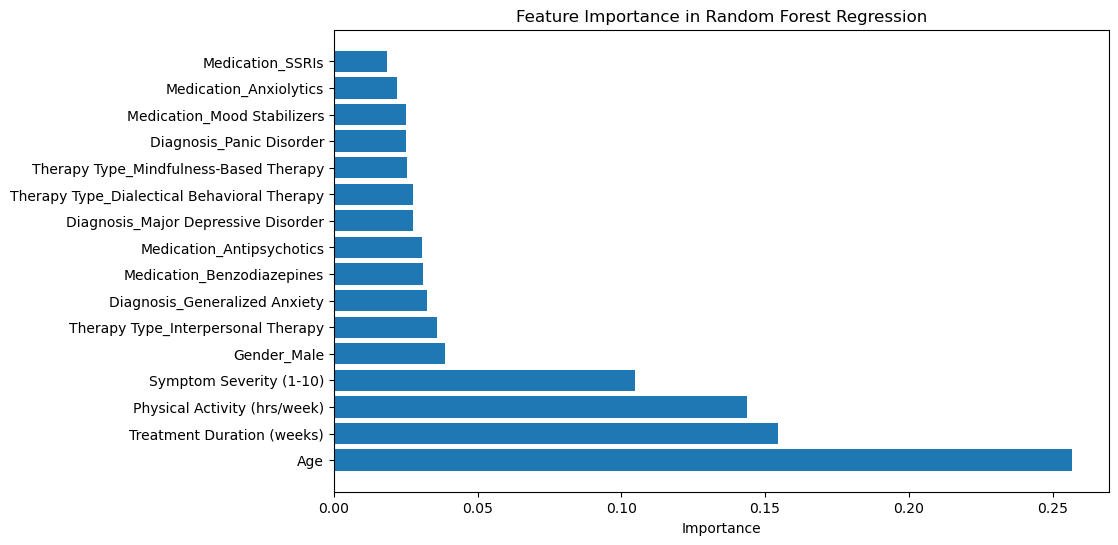

In [29]:
# Ambil importance fitur
feature_importance = rf_model.feature_importances_
features = X.columns

# Buat DataFrame untuk visualisasi
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Regression')
plt.show()

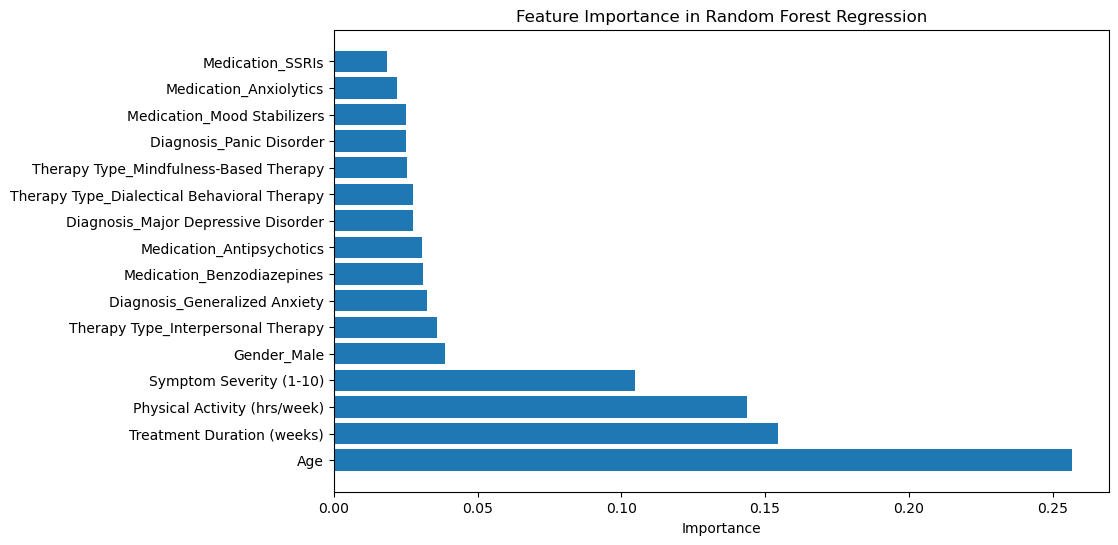

In [31]:
# Ambil importance fitur
feature_importance = rf_model.feature_importances_
features = X.columns

# Buat DataFrame untuk visualisasi
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Regression')
plt.show()

In [ ]:
# Definisikan parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Garis diagonal
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Adherence')
plt.show()